In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, binom
import seaborn as sns
import matplotlib.pyplot as plt


1.


In [2]:
k = poisson(17) #задаем пуассона, лямбда = 17 (среднее количество удачных событий)
a = []
for i in range(15): #генерим выборку 15 раз
    sample = k.rvs(size=100) #генерим выборку размером 100
    m = np.mean(sample) #среднее
    d = np.var(sample) #дисперсия
    a.append([round(abs(m - 17), 3),round(abs(d - 17), 3)]) #добавляем в список центрированное матожидание и дисперсию
print(a)
#в списке каждое четное значение - результат погрешности подсчетом через дисперсию, нечетное - средним
disp = 0
for i in a:
    if i[1] < i[0]: #если погрешность меньше добавляем плюсуем один в наше значение
        disp += 1
#если список заполнился больше чем на половину, значит дисперсия работает лучше среднего
if disp >= 9:
    print('дисперсия работает точнее (',disp,'/17)',sep='')
else:
    print('среднее работает точнее (',17 - disp,'/17)',sep='')
#вообще проще сделать из значений таблицу и сравнить столбцы среднего и дисперсии, но я слишком поздно об этом подумала

[[0.24, 1.022], [0.01, 3.73], [0.15, 5.967], [0.07, 0.045], [0.06, 0.456], [0.05, 2.512], [0.29, 2.106], [0.7, 0.35], [0.33, 0.561], [0.14, 2.48], [0.14, 0.8], [0.76, 0.062], [0.99, 4.07], [0.59, 1.198], [0.56, 6.046]]
среднее работает точнее (14/17)


4.


In [19]:
df = pd.read_csv('breast_cancer_1000_genes.tsv', sep = '\t', index_col = 0)
df.head()

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,...,TCGA-A2-A0YT-01A,TCGA-A2-A1FV-01A,TCGA-A2-A1FW-01A,TCGA-A2-A1FX-01A,TCGA-A2-A1FZ-01A,TCGA-A2-A1G0-01A,TCGA-A2-A1G1-01A,TCGA-A2-A1G4-01A,TCGA-A2-A1G6-01A,TCGA-A2-A259-01A
MT-CO3,12.208682,11.940729,13.206648,12.730925,12.149072,12.731782,12.450704,12.295202,11.796976,12.445482,...,12.651773,13.309171,12.063368,10.807096,11.676859,11.477643,12.042867,12.656959,11.617341,12.116037
MT-CO2,12.635929,12.496213,12.923663,12.780144,11.592246,12.105826,11.925842,12.907561,11.301659,12.192156,...,12.707383,13.619689,12.917135,11.349408,11.126341,11.420112,12.046082,12.216181,11.234004,11.894146
MT-CO1,12.685701,12.396964,12.763896,12.600145,11.909936,12.319483,12.042444,11.626691,11.533184,12.848486,...,12.730155,13.561623,12.534351,9.842210,11.990492,11.854787,12.129189,12.669717,11.581176,11.858962
MT-ND4,12.229181,12.203674,12.262444,12.551871,11.191639,11.919653,11.381076,12.141440,11.445795,11.837751,...,12.664408,13.767060,12.361202,11.488254,11.627389,11.880023,12.107653,12.266376,11.225196,11.643757
MT-ATP6,11.595923,10.911476,11.944841,12.044368,11.162862,11.803961,11.453770,11.100602,11.123729,11.622276,...,11.893174,12.864919,12.315150,10.761852,11.174210,11.277218,11.533258,12.257771,10.692620,10.916781


In [20]:
df['DIFFERENCE'] = df.max(axis=1) - df.min(axis=1)
df.sort_values('DIFFERENCE', inplace = True)
df.drop(columns=['DIFFERENCE'], inplace = True)
df.iloc[:10]
#посчитали макс-мин, отсортировали по нему, а теперь он нам не нужен и мы его удаляем, выписываем 10 лучших генов

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,...,TCGA-A2-A0YT-01A,TCGA-A2-A1FV-01A,TCGA-A2-A1FW-01A,TCGA-A2-A1FX-01A,TCGA-A2-A1FZ-01A,TCGA-A2-A1G0-01A,TCGA-A2-A1G1-01A,TCGA-A2-A1G4-01A,TCGA-A2-A1G6-01A,TCGA-A2-A259-01A
HNRNPK,6.675441,6.796077,6.958441,7.068352,6.991517,6.857940,6.677075,7.042980,7.067057,7.202030,...,7.075215,7.255656,7.268246,6.721882,7.151590,7.009554,7.280093,7.505274,6.800834,7.128158
PTBP1,5.603051,5.561286,5.790109,5.663378,5.288206,5.390911,5.179537,5.808586,5.473462,5.133682,...,5.632259,4.964091,5.508676,5.434338,5.414216,4.855927,5.605194,5.661330,5.058321,5.398859
HNRNPU,5.833629,5.732043,5.559935,6.049057,5.763373,5.820293,5.619546,6.131807,5.860039,6.036872,...,6.251432,6.043585,6.113584,5.640372,6.313956,6.021307,6.160279,6.151034,5.731610,5.896920
THRAP3,5.600375,4.726755,4.890649,5.512605,5.428645,5.336568,5.360885,5.558713,5.507255,5.309994,...,5.355802,5.289259,5.641980,5.163309,5.702870,5.789896,5.531240,5.736247,5.210635,5.331544
HNRNPC,5.707149,5.377302,6.361927,5.888832,5.969057,6.047580,5.921074,6.335045,5.505742,5.846155,...,5.810360,6.020692,5.904629,5.728609,5.773963,5.857538,5.880644,6.059715,5.686793,5.850953
PCNP,4.796936,4.760924,4.632000,4.674307,4.967848,4.993028,5.056752,4.885234,5.263525,5.367943,...,5.585778,5.859662,5.267452,5.258535,5.707556,5.172658,5.148825,5.702113,5.574881,5.472845
UBC,7.443829,7.893951,7.945849,7.514485,7.237292,7.259144,7.397200,8.093885,7.127632,7.805757,...,7.601790,7.366785,7.683589,7.592182,7.293006,7.448108,8.021657,7.365229,7.200299,7.453429
HNRNPA2B1,6.836209,7.251313,6.773732,6.761024,6.653110,6.564873,6.161195,6.428262,6.143153,6.351418,...,6.436099,6.568718,7.117867,6.497822,6.551621,6.446013,6.463356,6.825828,6.121331,6.267392
KHDRBS1,5.830610,5.515246,5.823324,6.026428,5.772873,5.662900,5.663338,5.328310,6.187860,5.593956,...,5.755458,5.882708,6.308065,5.677083,5.658476,5.736528,6.316073,6.181528,5.900871,5.654288
RAB7A,6.671247,6.833852,6.457624,6.457614,6.517878,6.345717,6.706182,6.773533,6.068021,6.994103,...,7.009331,6.609847,6.751752,6.781033,7.226522,6.539533,7.145039,6.980481,6.494139,6.403192


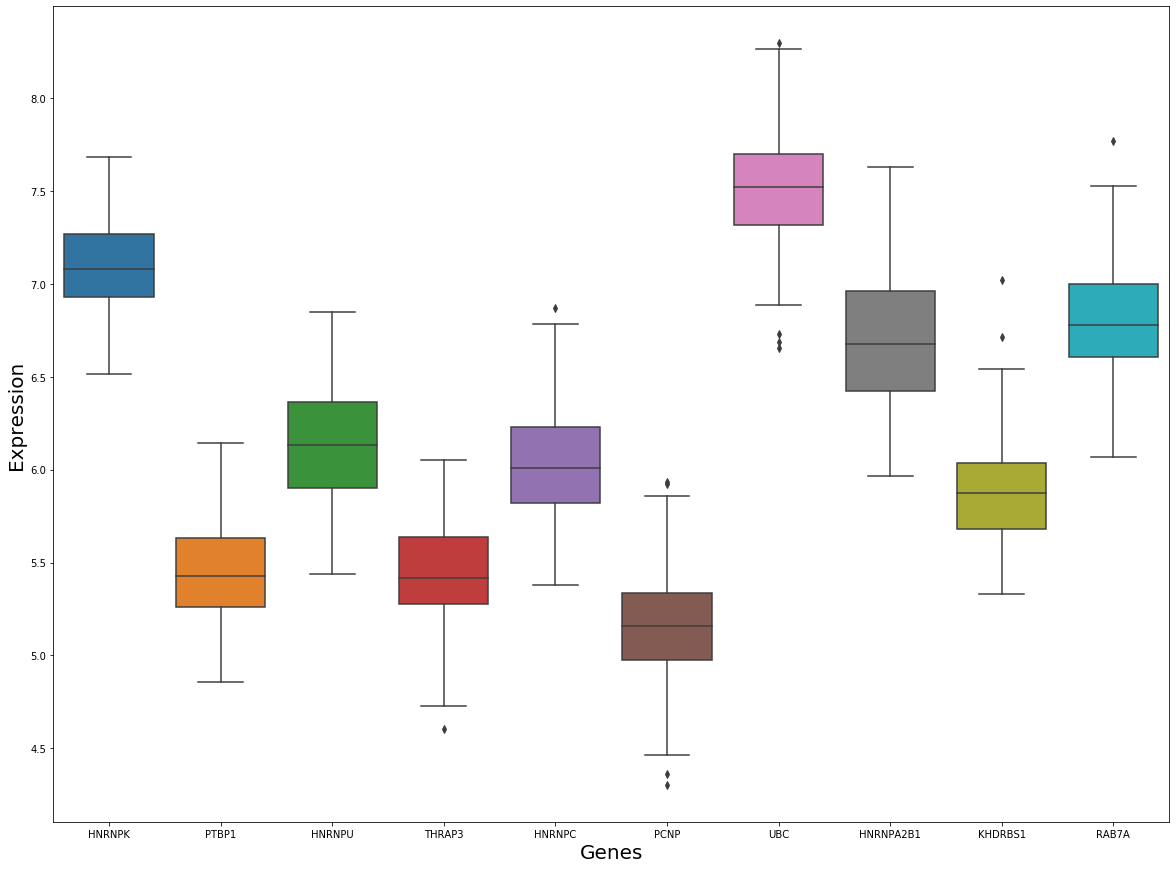

In [21]:
plt.figure(figsize=(20, 15)) #тут просто подогнала чтобы названия генов на оси х не пересекались
sns.boxplot( data=df.iloc[:10].T) #заменяем оси друг на друга
plt.xlabel("Genes", fontsize=20)
plt.ylabel("Expression", fontsize=20)
plt.show()

In [22]:
df['QUANTILE'] = df.quantile(q=0.75, axis=1)-df.quantile(q=0.25, axis=1)
df.sort_values('QUANTILE', inplace = True)
df.drop(columns=['QUANTILE'], inplace = True)
df.iloc[:10]

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,...,TCGA-A2-A0YT-01A,TCGA-A2-A1FV-01A,TCGA-A2-A1FW-01A,TCGA-A2-A1FX-01A,TCGA-A2-A1FZ-01A,TCGA-A2-A1G0-01A,TCGA-A2-A1G1-01A,TCGA-A2-A1G4-01A,TCGA-A2-A1G6-01A,TCGA-A2-A259-01A
SF1,5.266712,5.123668,5.245332,5.418286,5.477289,5.344983,5.107638,5.341786,5.695065,4.824749,...,4.863006,5.565719,5.900736,4.886234,5.109638,5.294775,5.415174,4.935240,5.454717,5.460976
HNRNPK,6.675441,6.796077,6.958441,7.068352,6.991517,6.857940,6.677075,7.042980,7.067057,7.202030,...,7.075215,7.255656,7.268246,6.721882,7.151590,7.009554,7.280093,7.505274,6.800834,7.128158
XRCC5,5.558180,5.410568,5.469650,6.210837,6.028700,6.025146,5.848973,5.951933,6.331331,6.221645,...,6.343300,5.533398,6.370755,5.969012,6.156796,6.049061,6.244795,6.441849,6.109489,6.294226
EIF4H,5.993038,6.360974,5.842736,5.898961,6.093436,5.948210,5.920104,5.861070,6.389121,6.190496,...,6.037276,6.039607,6.447235,6.082857,6.115659,6.235769,5.715438,6.544113,5.567917,6.045837
CNBP,6.699094,6.923702,6.715986,6.940529,7.288913,7.156589,7.030651,7.566195,7.315359,7.564783,...,7.433073,7.514900,7.088102,7.521253,7.510655,7.248727,7.731518,7.494424,7.319959,7.465309
PCNP,4.796936,4.760924,4.632000,4.674307,4.967848,4.993028,5.056752,4.885234,5.263525,5.367943,...,5.585778,5.859662,5.267452,5.258535,5.707556,5.172658,5.148825,5.702113,5.574881,5.472845
KHDRBS1,5.830610,5.515246,5.823324,6.026428,5.772873,5.662900,5.663338,5.328310,6.187860,5.593956,...,5.755458,5.882708,6.308065,5.677083,5.658476,5.736528,6.316073,6.181528,5.900871,5.654288
THRAP3,5.600375,4.726755,4.890649,5.512605,5.428645,5.336568,5.360885,5.558713,5.507255,5.309994,...,5.355802,5.289259,5.641980,5.163309,5.702870,5.789896,5.531240,5.736247,5.210635,5.331544
PTBP1,5.603051,5.561286,5.790109,5.663378,5.288206,5.390911,5.179537,5.808586,5.473462,5.133682,...,5.632259,4.964091,5.508676,5.434338,5.414216,4.855927,5.605194,5.661330,5.058321,5.398859
ARF6,4.962070,5.579418,5.817998,5.537857,5.544884,5.554845,5.491722,5.715491,5.615993,6.150773,...,5.880835,5.819528,5.348002,5.866530,5.800435,5.398895,5.827330,6.671893,5.445086,5.815021


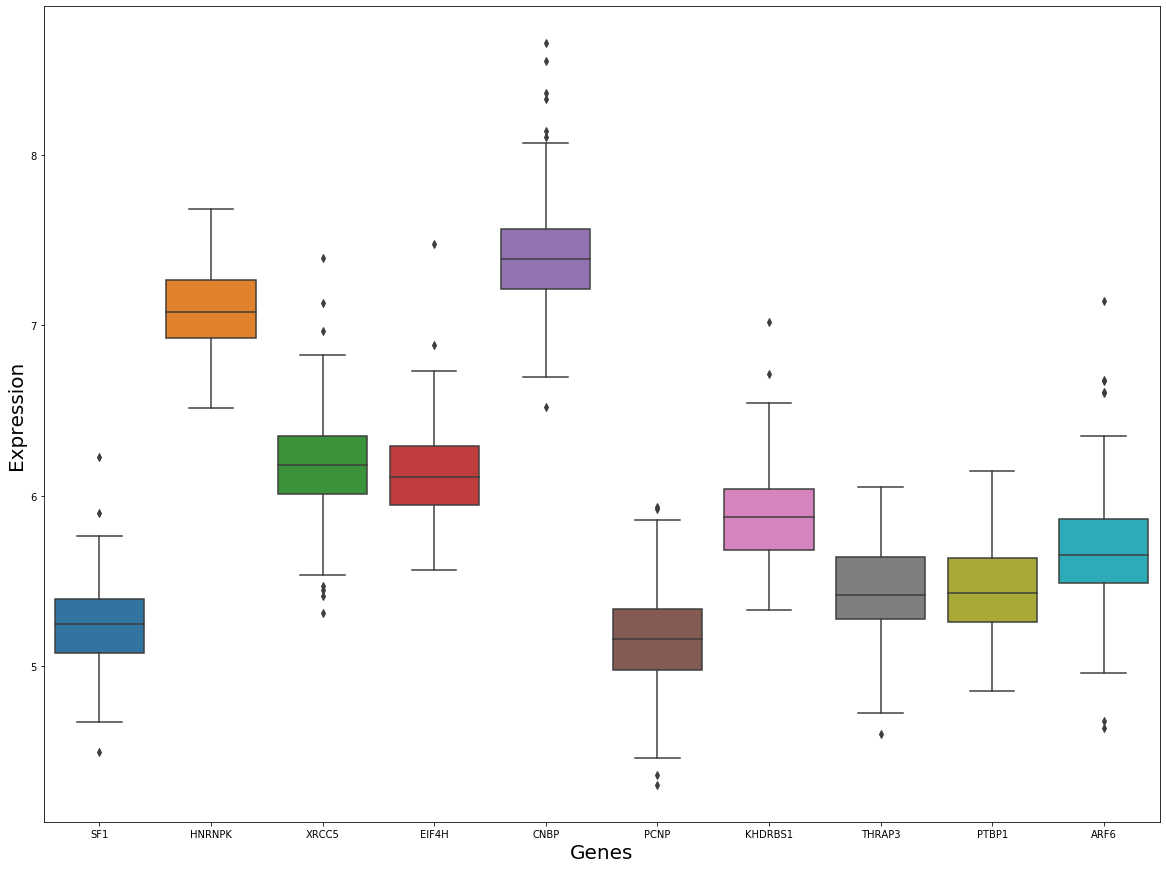

In [23]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.iloc[:10].T) #заменяем оси друг на друга
plt.xlabel("Genes", fontsize=20)
plt.ylabel("Expression", fontsize=20)
plt.show()

In [24]:
df['VARIANCE'] = df.var(axis=1)
df.sort_values('VARIANCE', inplace = True)
df.drop(columns=['VARIANCE'], inplace = True)
df.iloc[:10]

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,...,TCGA-A2-A0YT-01A,TCGA-A2-A1FV-01A,TCGA-A2-A1FW-01A,TCGA-A2-A1FX-01A,TCGA-A2-A1FZ-01A,TCGA-A2-A1G0-01A,TCGA-A2-A1G1-01A,TCGA-A2-A1G4-01A,TCGA-A2-A1G6-01A,TCGA-A2-A259-01A
HNRNPK,6.675441,6.796077,6.958441,7.068352,6.991517,6.857940,6.677075,7.042980,7.067057,7.202030,...,7.075215,7.255656,7.268246,6.721882,7.151590,7.009554,7.280093,7.505274,6.800834,7.128158
PTBP1,5.603051,5.561286,5.790109,5.663378,5.288206,5.390911,5.179537,5.808586,5.473462,5.133682,...,5.632259,4.964091,5.508676,5.434338,5.414216,4.855927,5.605194,5.661330,5.058321,5.398859
THRAP3,5.600375,4.726755,4.890649,5.512605,5.428645,5.336568,5.360885,5.558713,5.507255,5.309994,...,5.355802,5.289259,5.641980,5.163309,5.702870,5.789896,5.531240,5.736247,5.210635,5.331544
SF1,5.266712,5.123668,5.245332,5.418286,5.477289,5.344983,5.107638,5.341786,5.695065,4.824749,...,4.863006,5.565719,5.900736,4.886234,5.109638,5.294775,5.415174,4.935240,5.454717,5.460976
KHDRBS1,5.830610,5.515246,5.823324,6.026428,5.772873,5.662900,5.663338,5.328310,6.187860,5.593956,...,5.755458,5.882708,6.308065,5.677083,5.658476,5.736528,6.316073,6.181528,5.900871,5.654288
EIF4H,5.993038,6.360974,5.842736,5.898961,6.093436,5.948210,5.920104,5.861070,6.389121,6.190496,...,6.037276,6.039607,6.447235,6.082857,6.115659,6.235769,5.715438,6.544113,5.567917,6.045837
HNRNPC,5.707149,5.377302,6.361927,5.888832,5.969057,6.047580,5.921074,6.335045,5.505742,5.846155,...,5.810360,6.020692,5.904629,5.728609,5.773963,5.857538,5.880644,6.059715,5.686793,5.850953
RAB7A,6.671247,6.833852,6.457624,6.457614,6.517878,6.345717,6.706182,6.773533,6.068021,6.994103,...,7.009331,6.609847,6.751752,6.781033,7.226522,6.539533,7.145039,6.980481,6.494139,6.403192
PCNP,4.796936,4.760924,4.632000,4.674307,4.967848,4.993028,5.056752,4.885234,5.263525,5.367943,...,5.585778,5.859662,5.267452,5.258535,5.707556,5.172658,5.148825,5.702113,5.574881,5.472845
HNRNPU,5.833629,5.732043,5.559935,6.049057,5.763373,5.820293,5.619546,6.131807,5.860039,6.036872,...,6.251432,6.043585,6.113584,5.640372,6.313956,6.021307,6.160279,6.151034,5.731610,5.896920


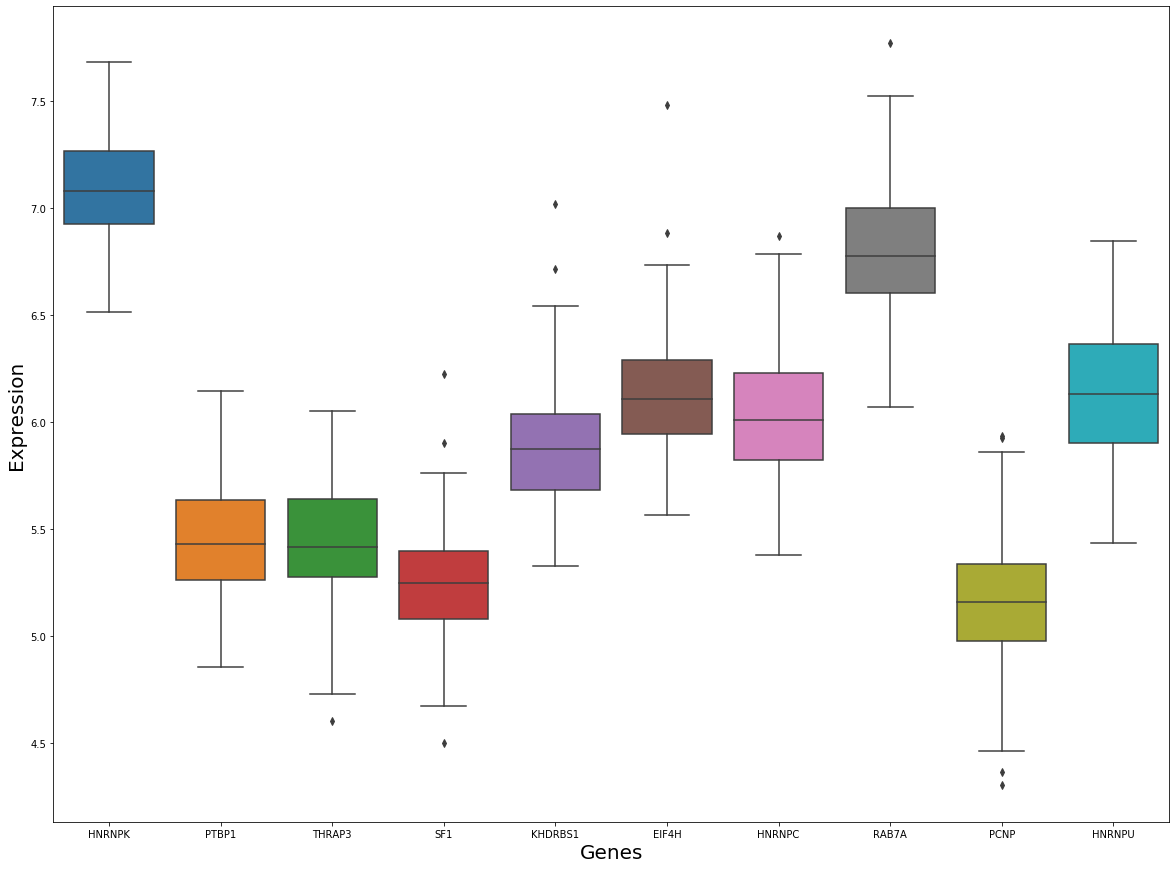

In [25]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.iloc[:10].T) #заменяем оси друг на друга
plt.xlabel("Genes", fontsize=20)
plt.ylabel("Expression", fontsize=20)
plt.show()

5.

In [26]:
dtf = pd.read_csv("breast_cancer_key_genes.tsv", sep="\t", index_col=0)
dtf.head()

,ESR1,PGR,ERBB2,MKI67
TCGA-3C-AAAU-01A,3.691075,2.975339,5.043666,3.314383
TCGA-3C-AALI-01A,0.336400,0.110920,9.717665,3.107031
TCGA-3C-AALJ-01A,4.688752,1.291904,5.630728,2.085183
TCGA-3C-AALK-01A,3.221422,2.930038,7.311545,2.298665
TCGA-4H-AAAK-01A,4.355086,3.867628,5.844283,2.416418


C:\Users\taran\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


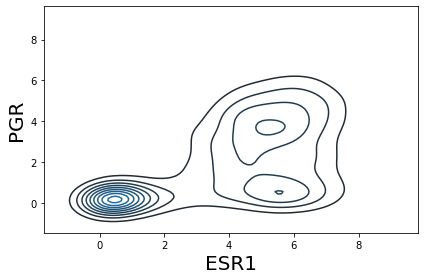

In [34]:
dtf = dtf.loc[:,['ESR1','PGR']] #выбираем нужные нам гены
sns.kdeplot(data=dtf)
plt.xlabel("ESR1", fontsize=20)
plt.ylabel("PGR", fontsize=20)
plt.tight_layout() 
#не разрешил мне сделать просто plt.show(), сказал что это многомерный график в 2д, поэтому надо бы подогнать оси друг под друга
#видим 3 грппы: оба гена экспрессируются мало, оба гена экспрессируются относительно много,ESR1 экпрессикуется значительно, а PGR почти не делает этого